In [1]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [5]:
img_width = 128
img_height = 128
img_size = (img_width, img_height)
channels = 3

In [3]:
train_images = os.listdir("train")

categories = []
for name in train_images:
    category = name.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({'train_images' : train_images, 'category' : categories})

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_width, img_height, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-08 18:57:28.899307: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-08 18:57:28.899417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [7]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]


In [8]:
batch_size=15

In [8]:
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255,shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(train_df,"train",x_col='train_images',y_col='category',target_size=img_size,class_mode='categorical',batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, "train", x_col='train_images',y_col='category',target_size=img_size,class_mode='categorical',batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [9]:
epochs=100
history = model.fit_generator(train_generator, epochs=epochs,validation_data=validation_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size,callbacks=callbacks)

Epoch 1/100


/var/folders/wt/g1sgwm617nj5rktvgm8bn9fw0000gn/T/ipykernel_14179/1383828820.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs,validation_data=validation_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size,callbacks=callbacks)
2022-05-08 18:57:29.404785: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-08 18:57:29.778514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1332/1333 [============================>.] - ETA: 0s - loss: 0.7631 - accuracy: 0.6200

2022-05-08 18:58:31.985832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1333/1333 [==============================] - 70s 52ms/step - loss: 0.7629 - accuracy: 0.6201 - val_loss: 0.6437 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 2/100
1333/1333 [==============================] - 66s 50ms/step - loss: 0.5995 - accuracy: 0.6795 - val_loss: 0.5185 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 3/100
1333/1333 [==============================] - 66s 49ms/step - loss: 0.5521 - accuracy: 0.7214 - val_loss: 0.5134 - val_accuracy: 0.7427 - lr: 0.0010
Epoch 4/100
1332/1333 [============================>.] - ETA: 0s - loss: 0.5228 - accuracy: 0.7419
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 [==============================] - 67s 50ms/step - loss: 0.5228 - accuracy: 0.7419 - val_loss: 0.5490 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 5/100
1333/1333 [==============================] - 66s 50ms/step - loss: 0.4766 - accuracy: 0.7691 - val_loss: 0.4111 - val_accuracy: 0.8128 - lr: 5.0000e-04
Epoch 6/100
1333/1333 [======================

In [10]:
model.save("model1_catsVSdogs_100epoch.h5")

In [2]:
model = load_model("model1_catsVSdogs_100epoch.h5")

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-08 23:05:45.325835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-08 23:05:45.326191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
test_images = os.listdir("test1")

test_df = pd.DataFrame({
    'test_images': test_images,
})
nb_samples = test_df.shape[0]

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(test_df, "test1",x_col='test_images',y_col=None, target_size=img_size, class_mode=None, batch_size=batch_size)

Found 12500 validated image filenames.


In [10]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/var/folders/wt/g1sgwm617nj5rktvgm8bn9fw0000gn/T/ipykernel_16948/3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
2022-05-08 23:06:35.183072: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-08 23:06:35.289665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [11]:
test_df['category'] = np.argmax(predict, axis=1)
test_df['category'] = test_df['category'].replace({1 : 'dog', 0 : 'cat'})

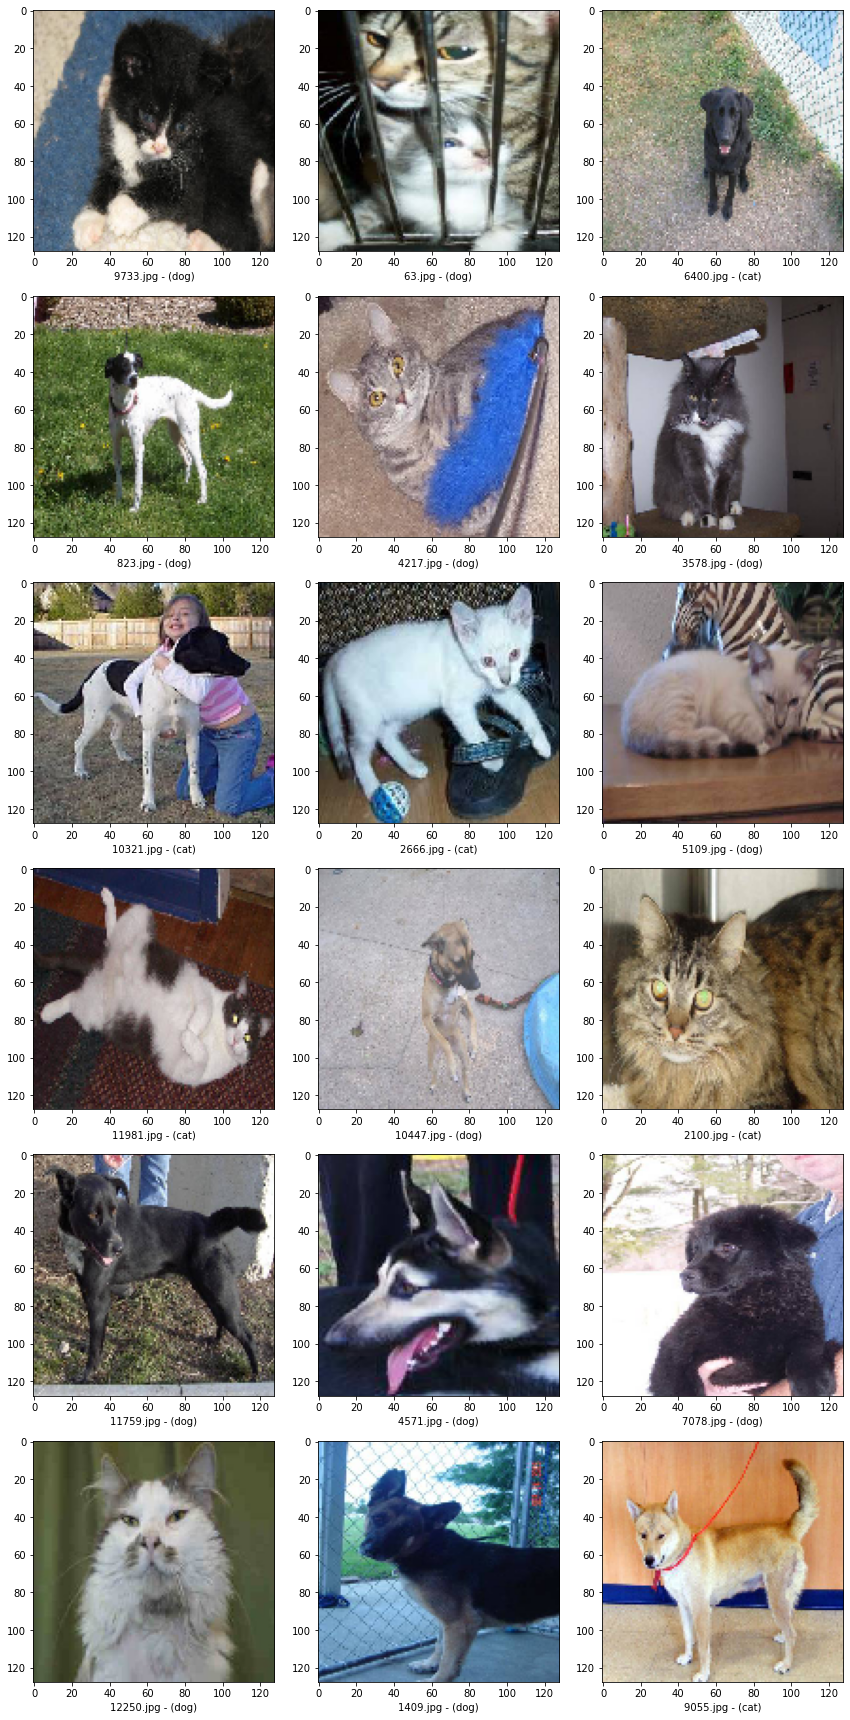

In [12]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['test_images']
    category = row['category']
    img = load_img("test1/"+filename, target_size=img_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' - (' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [16]:
print(test_df)

      test_images category
0        9733.jpg      dog
1          63.jpg      dog
2        6400.jpg      cat
3         823.jpg      dog
4        4217.jpg      dog
...           ...      ...
12495    3561.jpg      dog
12496    8434.jpg      dog
12497    7707.jpg      dog
12498    6419.jpg      cat
12499    1376.jpg      dog

[12500 rows x 2 columns]
